# Лабораторная работа 2. Вариант 5.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import norm, binom, poisson
from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1. 
Загрузить данные из файла train.csv. Подготовить данные для
дальнейшего анализа, исключив их них экстремально большие
значения.

In [4]:
df = pd.read_csv(r'train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Рассмотрим описательные статистики для переменной SalePrice.

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Удалим все значения, которые не попадают в интервал $mean \pm 3std$. Так как нас интересуют именно экстремально большие значения, то рассмотрим правую границу: $180921 + 238327.5 = 419248.5$

In [8]:
df = df[df['SalePrice'] < 419248]
data = df['SalePrice']

data.describe()

count      1438.000000
mean     175844.522253
std       67475.861228
min       34900.000000
25%      129500.000000
50%      161500.000000
75%      210000.000000
max      415298.000000
Name: SalePrice, dtype: float64

Видим, что все показатели, кроме наибольшего значения, изменились незначительно. 

## Задание 2. 

Подобрать три непрерывных распределения (минимум два должны
подходить по форме) и с помощью каждого из них приблизить
соответствующие распределения выборочных данн.

Сперва выясним форму распределения выбранных данных самым простым способом, а именно построим гистограмму распредлеения.ых

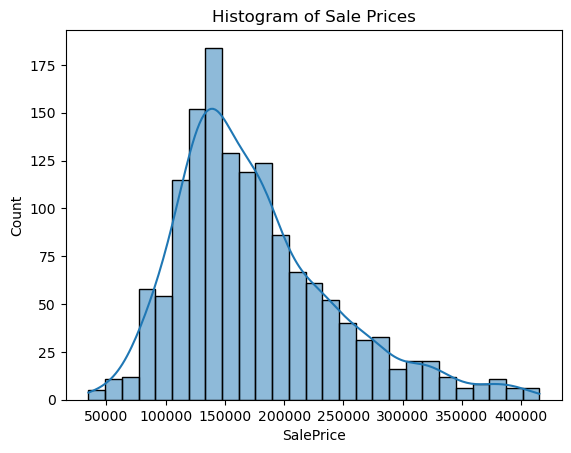

In [10]:
sns.histplot(data, kde=True)

plt.title('Histogram of Sale Prices')
plt.show()

В целом, опираясь только на гистограмму, можно сказать, что наше распределение напоминает Биномиальное распределение или распределение Пуассона. И в качестве третьего распределения возьмем нормальное распределение

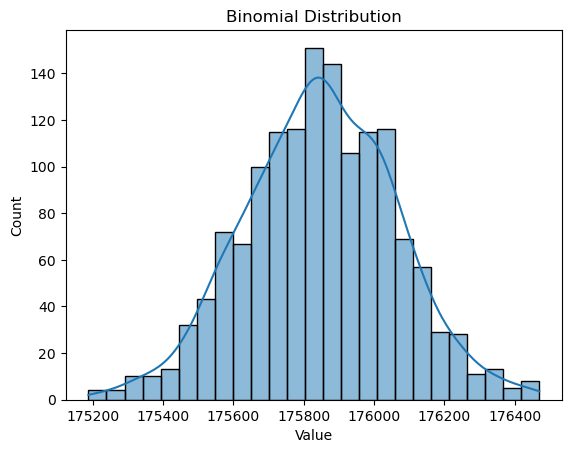

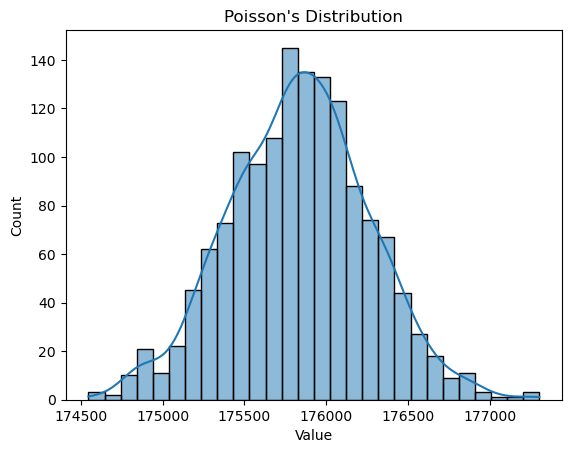

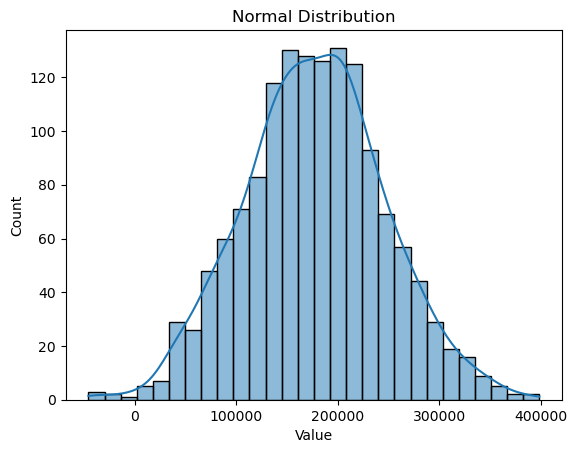

In [68]:
n_binom = data.mean() + data.std()
p_binom = data.mean() / n_binom
binom_data = np.random.binomial(n_binom, p_binom, len(data))

mu_poisson = np.mean(data)
poisson_data = np.random.poisson(mu_poisson, len(data))

mu_norm = np.mean(data)
std_norm = np.std(data)
norm_data = np.random.normal(mu_norm, std_norm, len(data))

sns.histplot(binom_data,kde=True)
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

sns.histplot(poisson_data, kde=True)
plt.title("Poisson's Distribution")
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

sns.histplot(norm_data, kde=True)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()